In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Hierachical.csv')
data.head()


,Production Budget,Genre,Worldwide Gross Income
0,43,action,94
1,43,adventure,140
2,44,action,80
3,44,adventure,132
4,45,adventure,110


In [5]:
data = data.drop(['Genre'], axis = 1) 

In [6]:
#So, let’s first normalize the data and bring all the variables to the same scale:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Production Budget,Worldwide Gross Income
0,0.415988,0.909370
1,0.293606,0.955927
2,0.481919,0.876216
3,0.316228,0.948683
4,0.378633,0.925547


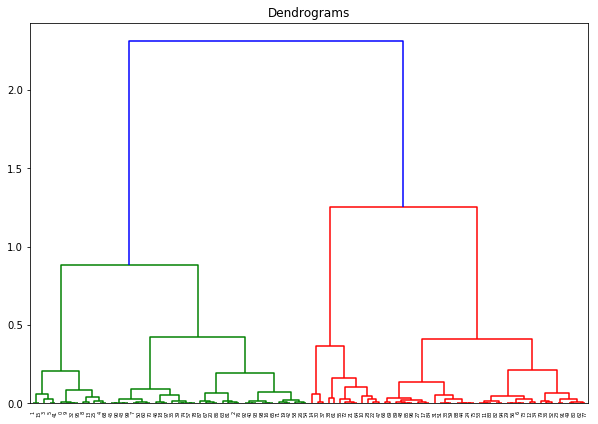

In [7]:
#Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s
#first draw the dendrogram to help us decide the number of clusters for this particular problem:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

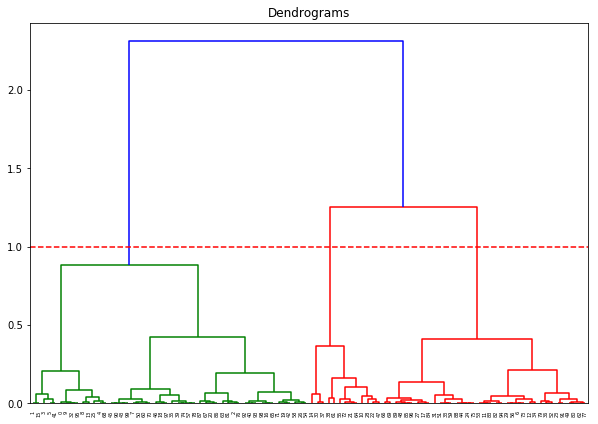

In [9]:
#The x-axis contains the samples and y-axis represents the distance between these samples. The vertical
#line with maximum distance is the blue line and hence we can decide a 
#threshold of 1 and cut the dendrogram:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

In [10]:
#We have two clusters as this line cuts the dendrogram at two points. Let’s
#now apply hierarchical clustering for 2 clusters:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

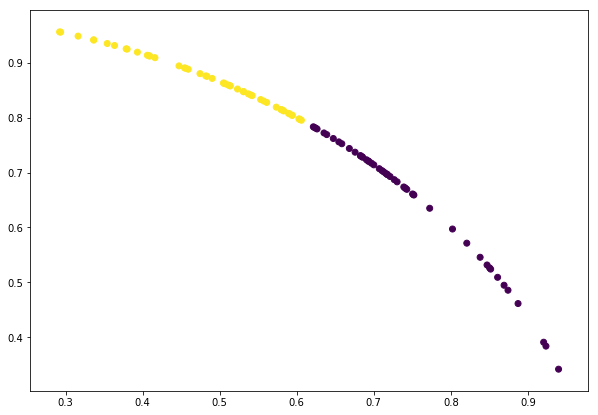

In [13]:
#We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in 
#the second cluster. Let’s now visualize the two clusters:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Production Budget'], data_scaled['Worldwide Gross Income'], c=cluster.labels_) 